In [98]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime

In [99]:
ff1.plotting.setup_mpl()

In [100]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

In [101]:
session = ff1.get_session(year, gp,sessiontype)
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3',

In [102]:
choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))

In [103]:
if choicedrivers==1: 
    quali_results=session.results
    quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
    quali_results[['Abbreviation']]
    x=quali_results['Abbreviation'].iloc[0]
    y=quali_results['Abbreviation'].iloc[1]
    driver1=x
    driver2=y

else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")


In [104]:
driver1=driver1.upper()
driver2=driver2.upper()

In [105]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
fastest_1=laps_1.pick_fastest()
fastest_2=laps_2.pick_fastest()

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARN

In [135]:
laps_1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.885000,33,NaT,1,1,0 days 00:23:01.492000,NaT,NaT,0 days 00:00:38.428000,0 days 00:00:33.563000,...,False,SOFT,4.0,False,0 days 01:02:21.871000,Red Bull Racing,VER,1,False,2021-12-12 13:03:21.881
1,0 days 01:05:23.988000,33,0 days 00:01:29.103000,2,1,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,0 days 00:00:32.961000,...,False,SOFT,5.0,False,0 days 01:03:54.885000,Red Bull Racing,VER,1,True,2021-12-12 13:04:54.895
2,0 days 01:06:52.815000,33,0 days 00:01:28.827000,3,1,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,0 days 00:00:32.785000,...,False,SOFT,6.0,False,0 days 01:05:23.988000,Red Bull Racing,VER,1,True,2021-12-12 13:06:23.998
3,0 days 01:08:21.841000,33,0 days 00:01:29.026000,4,1,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,0 days 00:00:32.882000,...,False,SOFT,7.0,False,0 days 01:06:52.815000,Red Bull Racing,VER,1,True,2021-12-12 13:07:52.825
4,0 days 01:09:50.559000,33,0 days 00:01:28.718000,5,1,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,0 days 00:00:32.636000,...,False,SOFT,8.0,False,0 days 01:08:21.841000,Red Bull Racing,VER,1,True,2021-12-12 13:09:21.851
5,0 days 01:11:19.266000,33,0 days 00:01:28.707000,6,1,NaT,NaT,0 days 00:00:17.958000,0 days 00:00:38.014000,0 days 00:00:32.735000,...,False,SOFT,9.0,False,0 days 01:09:50.559000,Red Bull Racing,VER,1,True,2021-12-12 13:10:50.569
6,0 days 01:12:47.902000,33,0 days 00:01:28.636000,7,1,NaT,NaT,0 days 00:00:18,0 days 00:00:38.046000,0 days 00:00:32.590000,...,False,SOFT,10.0,False,0 days 01:11:19.266000,Red Bull Racing,VER,1,True,2021-12-12 13:12:19.276
7,0 days 01:14:16.719000,33,0 days 00:01:28.817000,8,1,NaT,NaT,0 days 00:00:18.064000,0 days 00:00:38.188000,0 days 00:00:32.565000,...,False,SOFT,11.0,False,0 days 01:12:47.902000,Red Bull Racing,VER,1,True,2021-12-12 13:13:47.912
8,0 days 01:15:45.390000,33,0 days 00:01:28.671000,9,1,NaT,NaT,0 days 00:00:18.022000,0 days 00:00:38.197000,0 days 00:00:32.452000,...,False,SOFT,12.0,False,0 days 01:14:16.719000,Red Bull Racing,VER,1,True,2021-12-12 13:15:16.729
9,0 days 01:17:14.280000,33,0 days 00:01:28.890000,10,1,NaT,NaT,0 days 00:00:18.025000,0 days 00:00:38.207000,0 days 00:00:32.658000,...,False,SOFT,13.0,False,0 days 01:15:45.390000,Red Bull Racing,VER,1,True,2021-12-12 13:16:45.400


In [138]:
total_race1=laps_1.get_car_data().add_distance()
total_race2=laps_2.get_car_data().add_distance()

In [106]:
driver1_telemetry=fastest_1.get_car_data().add_distance()
driver2_telemetry=fastest_2.get_car_data().add_distance()

In [107]:
driver1_color=plotting.team_color(fastest_1['Team'])
driver2_color=plotting.team_color(fastest_2['Team'])
if(driver1_color==driver2_color):
    driver2_color='#FFFFFF'
    

In [108]:

quali_results

,DriverNumber,BroadcastName,Abbreviation,TeamName,Position,Q1,Q2,Q3
33,33,M VERSTAPPEN,VER,Red Bull Racing,1.0,NaT,NaT,NaT
55,55,C SAINZ,SAI,Ferrari,2.0,NaT,NaT,NaT
4,4,L NORRIS,NOR,McLaren,3.0,NaT,NaT,NaT
11,11,S PEREZ,PER,Red Bull Racing,4.0,NaT,NaT,NaT
5,5,S VETTEL,VET,Aston Martin,5.0,NaT,NaT,NaT
10,10,P GASLY,GAS,AlphaTauri,6.0,NaT,NaT,NaT
44,44,L HAMILTON,HAM,Mercedes,7.0,NaT,NaT,NaT
18,18,L STROLL,STR,Aston Martin,8.0,NaT,NaT,NaT
31,31,E OCON,OCO,Alpine,9.0,NaT,NaT,NaT
99,99,A GIOVINAZZI,GIO,Alfa Romeo Racing,10.0,NaT,NaT,NaT


In [109]:
#delta_ms=round(delta.total_seconds()*1000)
nameevent=session.event['OfficialEventName']

In [110]:
nameevent

'FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2021'

In [111]:
driver1_telemetry

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2021-12-12 14:00:43.084,10828,235,6,100,False,0,car,0 days 00:00:00.171000,0 days 01:59:43.074000,11.162500
1,2021-12-12 14:00:43.324,11005,240,6,100,False,0,car,0 days 00:00:00.411000,0 days 01:59:43.314000,27.162500
2,2021-12-12 14:00:43.564,11245,244,6,100,False,0,car,0 days 00:00:00.651000,0 days 01:59:43.554000,43.429167
3,2021-12-12 14:00:43.804,11407,251,6,100,False,0,car,0 days 00:00:00.891000,0 days 01:59:43.794000,60.162500
4,2021-12-12 14:00:44.005,11568,254,6,100,False,0,car,0 days 00:00:01.092000,0 days 01:59:43.995000,74.344167
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-12 14:02:07.964,11119,194,4,100,False,0,car,0 days 00:01:25.051000,0 days 02:01:07.954000,5152.500000
361,2021-12-12 14:02:08.204,11038,207,5,100,False,0,car,0 days 00:01:25.291000,0 days 02:01:08.194000,5166.300000
362,2021-12-12 14:02:08.444,11297,214,5,100,False,0,car,0 days 00:01:25.531000,0 days 02:01:08.434000,5180.566667
363,2021-12-12 14:02:08.684,11688,223,5,100,False,0,car,0 days 00:01:25.771000,0 days 02:01:08.674000,5195.433333


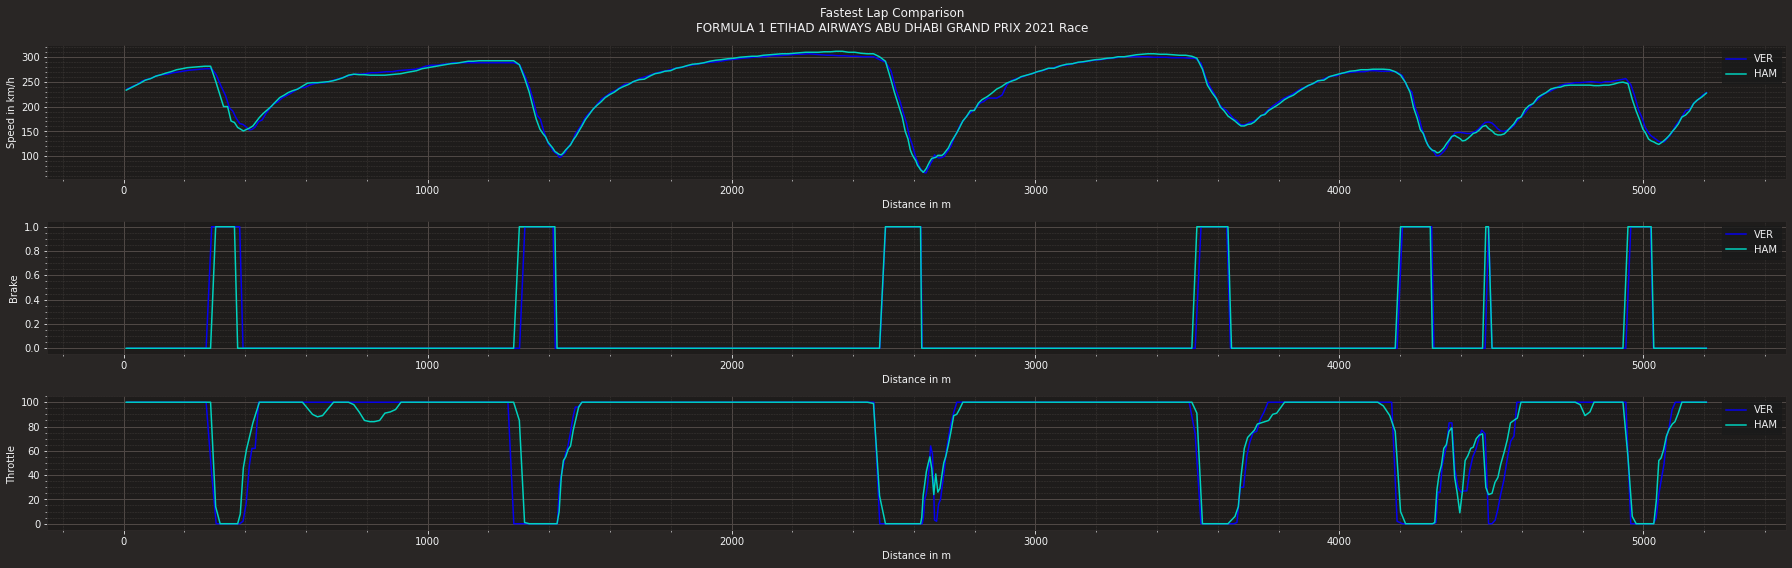

In [112]:
fig, ax = plt.subplots(3)
ax[0].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], color=driver1_color, label=driver1)
ax[0].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], color=driver2_color, label=driver2)

ax[0].set_xlabel('Distance in m')
ax[0].set_ylabel('Speed in km/h')

ax[0].legend()

ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], color=driver1_color, label=driver1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], color=driver2_color, label=driver2)

ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Brake ')

ax[1].legend()

ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], color=driver1_color, label=driver1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], color=driver2_color, label=driver2)

ax[2].set_xlabel('Distance in m')
ax[2].set_ylabel('Throttle ')

ax[2].legend()

plt.suptitle(f"Fastest Lap Comparison  \n"
             f"{nameevent} {session.name}  ")
fig.set_size_inches(25, 8)
plt.savefig(nameevent +' '+session.name+'telecomparision.jpg')
plt.tight_layout()
plt.show()

In [124]:
one=fastest_1.LapTime
two=fastest_2.LapTime
if one<two:
    min=one
    max=two
else:
    min=two
    max=one
delta=max-min

deltams=round(delta.total_seconds()*1000)

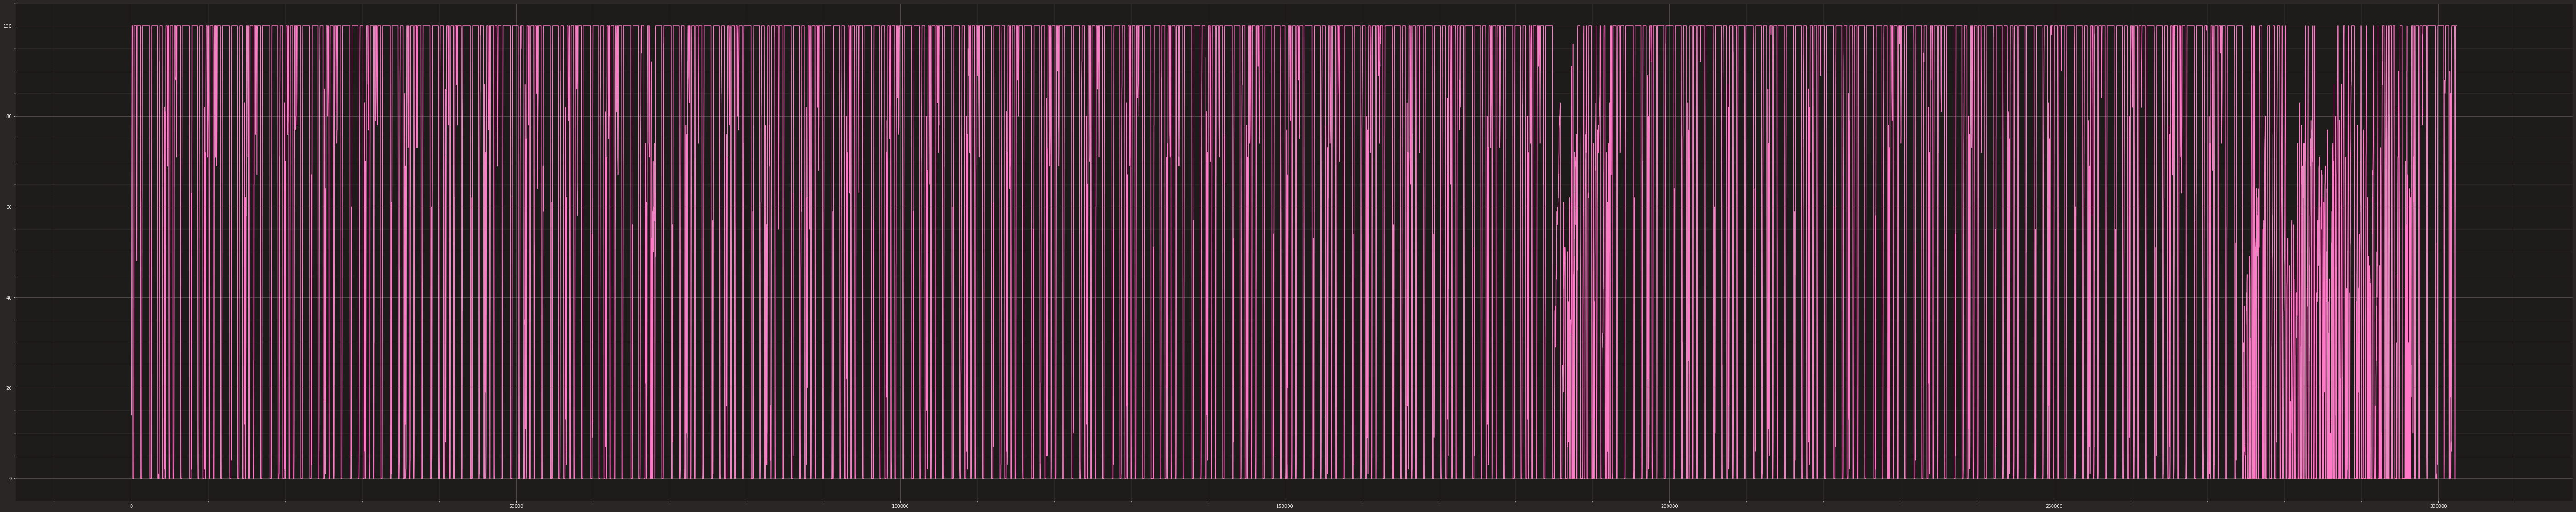

In [147]:
fig, ax = plt.subplots()
ax.plot(total_race1['Distance'], total_race1['Throttle'])
fig.set_size_inches(100, 20)
plt.show()

In [173]:
total_race1.slice_by_laps()

AttributeError: 'Telemetry' object has no attribute 'slice_by_laps'

In [176]:
import fastf1 as ff1
import matplotlib.pyplot as plt

sessions = ff1.get_session(2020, 5, 'R')
sessions.load_laps()

lec = sessions.car_data['LEC']

plt.figure()
plt.plot(lec['Time'], lec['Speed'])
plt.show()

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for 70th Anniversary Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '16', '23', '18', '27', '31', '4', '26', '10', '5', '55', '3', '7', '8', '99', '63', '6', '20']


KeyError: 'LEC'

In [181]:
sessions.car_data[]

SyntaxError: invalid syntax (1745784077.py, line 1)

In [158]:
sessiondf=pd.DataFrame(session.laps)

In [167]:
sessiondf[sessiondf['DriverNumber']=='44']

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
58,0 days 01:03:53.753000,44,NaT,1,1,0 days 00:24:45.125000,NaT,NaT,0 days 00:00:38.189000,0 days 00:00:33.146000,...,False,MEDIUM,4.0,False,0 days 01:02:21.871000,Mercedes,HAM,1,False,2021-12-12 13:03:21.881
59,0 days 01:05:22.544000,44,0 days 00:01:28.791000,2,1,NaT,NaT,0 days 00:00:17.961000,0 days 00:00:38.053000,0 days 00:00:32.777000,...,False,MEDIUM,5.0,False,0 days 01:03:53.753000,Mercedes,HAM,1,True,2021-12-12 13:04:53.763
60,0 days 01:06:51.131000,44,0 days 00:01:28.587000,3,1,NaT,NaT,0 days 00:00:18.136000,0 days 00:00:37.860000,0 days 00:00:32.591000,...,False,MEDIUM,6.0,False,0 days 01:05:22.544000,Mercedes,HAM,1,True,2021-12-12 13:06:22.554
61,0 days 01:08:19.920000,44,0 days 00:01:28.789000,4,1,NaT,NaT,0 days 00:00:18.013000,0 days 00:00:38.111000,0 days 00:00:32.665000,...,False,MEDIUM,7.0,False,0 days 01:06:51.131000,Mercedes,HAM,1,True,2021-12-12 13:07:51.141
62,0 days 01:09:48.550000,44,0 days 00:01:28.630000,5,1,NaT,NaT,0 days 00:00:18.001000,0 days 00:00:38.137000,0 days 00:00:32.492000,...,False,MEDIUM,8.0,False,0 days 01:08:19.920000,Mercedes,HAM,1,True,2021-12-12 13:09:19.930
63,0 days 01:11:17.143000,44,0 days 00:01:28.593000,6,1,NaT,NaT,0 days 00:00:17.981000,0 days 00:00:38.201000,0 days 00:00:32.411000,...,False,MEDIUM,9.0,False,0 days 01:09:48.550000,Mercedes,HAM,1,True,2021-12-12 13:10:48.560
64,0 days 01:12:45.693000,44,0 days 00:01:28.550000,7,1,NaT,NaT,0 days 00:00:17.993000,0 days 00:00:38.122000,0 days 00:00:32.435000,...,False,MEDIUM,10.0,False,0 days 01:11:17.143000,Mercedes,HAM,1,True,2021-12-12 13:12:17.153
65,0 days 01:14:14.278000,44,0 days 00:01:28.585000,8,1,NaT,NaT,0 days 00:00:18.031000,0 days 00:00:38.157000,0 days 00:00:32.397000,...,False,MEDIUM,11.0,False,0 days 01:12:45.693000,Mercedes,HAM,1,True,2021-12-12 13:13:45.703
66,0 days 01:15:42.634000,44,0 days 00:01:28.356000,9,1,NaT,NaT,0 days 00:00:18.063000,0 days 00:00:38.148000,0 days 00:00:32.145000,...,False,MEDIUM,12.0,False,0 days 01:14:14.278000,Mercedes,HAM,1,True,2021-12-12 13:15:14.288
67,0 days 01:17:10.850000,44,0 days 00:01:28.216000,10,1,NaT,NaT,0 days 00:00:17.921000,0 days 00:00:38.146000,0 days 00:00:32.149000,...,False,MEDIUM,13.0,False,0 days 01:15:42.634000,Mercedes,HAM,1,True,2021-12-12 13:16:42.644
